# Profiling & Visualising Customer Category Insights:

1. Importing libraries and dataset
2. Creating Regional Segmentation to analyse spending behaviours [using for, if, crosstab()]
3. Age profiling [using .loc() and .plot.pie()] [using .crosstab() and plot(kind = barh, color = sns.color_palette)]
3.1 Age - Region grouping 
3.2 Age - Department grouping 
4. Income profiling [using .loc() and .plot.pie()] [using .crosstab() and plot(kind = barh, color = sns.color_palette)]
4.1 Income - Region grouping 
4.2 Income - Department grouping 
5. Family Status profiling [using .loc() and .plot.pie()] [using .crosstab() and plot(kind = barh, color = sns.color_palette)]
5.1 Family Status - Region grouping
5.2 Family Status - Department grouping 
6. Day of week profiling [using .loc() and .plot.pie()] [using .crosstab() and plot(kind = barh, color = sns.color_palette)]
6.1 Day of week - Region grouping
6.2 Day of week - Department grouping 
7. Exporting final dataframe

## 1. Importing libraries and dataset

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
%run EnvFile.ipynb

Stored 'path' (str)


In [3]:
# Import dataset

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_dept_customers.pkl'))

## 2. Creating Regional Segmentation to analyse spending behaviours

In [4]:
# Assign States within Regions

region = []
for value in df_all['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania','New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']):
        region.append('West')
    else:
        region.append('South')

In [5]:
# Create column 'region'

df_all['region'] = region

In [6]:
df_all['region'].value_counts(dropna = False)

South        10791699
West          8292777
Midwest       7597170
Northeast     5722643
Name: region, dtype: int64

In [7]:
# Creating a crosstab between region and spendingflag

region_spend = pd.crosstab(df_all['region'],df_all['spending_flag'],dropna = False)

In [8]:
region_spend

spending_flag,High Spender,Low Spender
region,,
Midwest,29293,7567877
Northeast,18641,5704002
South,40739,10750960
West,31286,8261491


## 3. Age profiling

In [9]:
df_all.loc[(df_all['age'] <= 40), 'age_profile'] = '18-40'
df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60), 'age_profile'] = '41-60'
df_all.loc[(df_all['age'] > 60), 'age_profile'] = '60+'
df_all['age_profile'].value_counts(dropna = False)

18-40    11669825
60+      10582627
41-60    10151837
Name: age_profile, dtype: int64

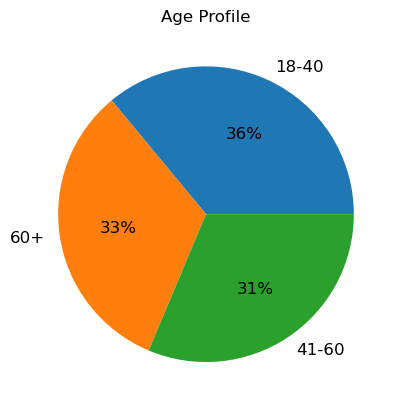

In [10]:
# Categorizing age visually using pie chart

age_profile_pie = df_all['age_profile'].value_counts().plot.pie(title ='Age Profile', label = '', fontsize = 12, autopct=('%1.f%%'))

#### Number of customers in the age group of 18-40 is the highest.

In [11]:
# Exporting age profile distribution chart

age_profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profile_pie.png'))

In [12]:
# Summary statistics of age across order frequency and expenditure

age_sums = df_all.groupby(['age_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
age_sums

days_since_prior_order                  prices                  \
                               min   max       mean    min   max      mean   
age_profile                                                                  
18-40                          0.0  30.0  11.109723    1.0  25.0  7.787647   
41-60                          0.0  30.0  11.119149    1.0  25.0  7.791990   
60+                            0.0  30.0  11.083210    1.0  25.0  7.797106   

                          
                     sum  
age_profile               
18-40        90880472.62  
41-60        79103009.10  
60+          82513862.20

#### Customers across all age profile have 11 days between each orders. Customers under the age group of 18-40 has contributed the highest revenue to Instacart followed by 60+ and 41-60.

### 3.1 Age - Region Grouping

In [13]:
#Creating a crosstab of the regions and age groups

crosstab_region_age = pd.crosstab(df_all['region'], df_all['age_profile'], dropna = False)

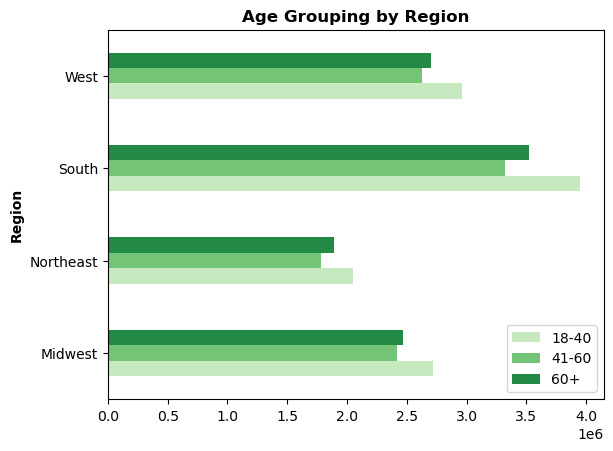

In [14]:
#Creating a stacked bar chart of the regions, divided up by the age groups

region_age = crosstab_region_age.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Region', fontweight = 'bold', fontsize = 10)
plt.title('Age Grouping by Region', fontweight = 'bold', fontsize = 12)
plt.show()

#### Customers with age group 18-40 in southern region is the highest category.

In [15]:
# Exporting age profile region chart

region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_age.png'))

### 3.2 Age - Department Grouping

In [16]:
# Creating a crosstab of the department and age groups

crosstab_dept_age = pd.crosstab(df_all['department'], df_all['age_profile'], dropna = False)

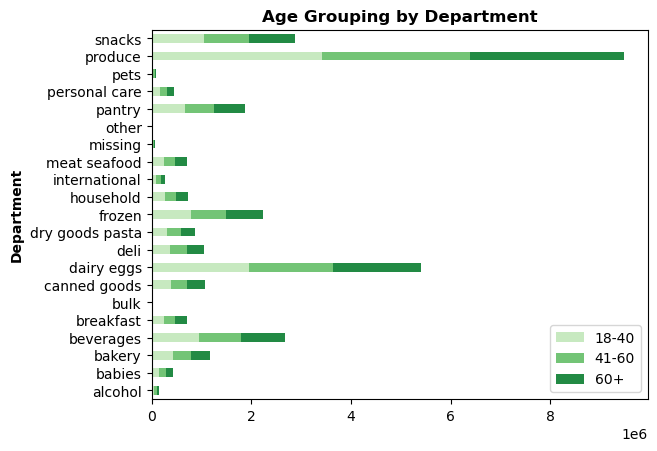

In [17]:
#Creating a stacked bar chart of the departments, divided up by the age groups

dept_age = crosstab_dept_age.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold', fontsize = 10)
plt.title('Age Grouping by Department', fontweight = 'bold', fontsize = 12)
plt.show()

#### Produce is the highest category in department followed by dairy eggs across age groups.

In [18]:
# Exporting age profile dept chart

dept_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_age.png'))

## 4. Income Profiling

In [19]:
df_all.loc[(df_all['income'] <= 50000), 'income_profile'] = '<=50k'
df_all.loc[(df_all['income'] > 50000) & (df_all['income'] <= 150000), 'income_profile'] = '50k - 150k'
df_all.loc[(df_all['income'] > 150000), 'income_profile'] = '150k+'
df_all['income_profile'].value_counts(dropna = False)

50k - 150k    24759485
150k+          4050776
<=50k          3594028
Name: income_profile, dtype: int64

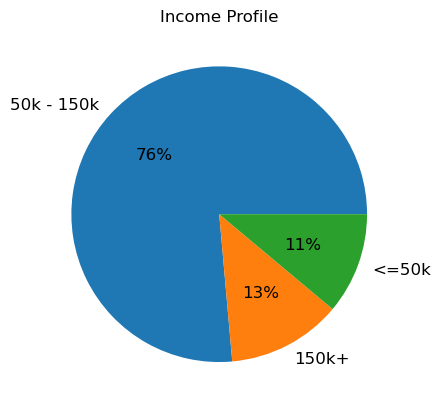

In [20]:
# Categorizing income visually using pie chart

income_profile_pie = df_all['income_profile'].value_counts().plot.pie(title ='Income Profile', label = '', fontsize = 12, autopct=('%1.f%%'))

#### Customers in the income category of 50k-150k are the highest in number.

In [21]:
# Exporting income profile distribution chart

income_profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_pie.png'))

In [22]:
# Summary statistics of income across order frequency and expenditure

income_sums = df_all.groupby(['income_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
income_sums

days_since_prior_order                  prices                  \
                                  min   max       mean    min   max      mean   
income_profile                                                                  
150k+                             0.0  30.0  10.941357    1.0  25.0  7.953118   
50k - 150k                        0.0  30.0  11.061276    1.0  25.0  7.924709   
<=50k                             0.0  30.0  11.587171    1.0  25.0  6.697037   

                              
                         sum  
income_profile                
150k+           3.221630e+07  
50k - 150k      1.962117e+08  
<=50k           2.406934e+07

#### The number of days between each order is 10 or 11 across customers of all income category. Customers with income above 150k have contributed the highest revenue to Instacart.

### 4.1 Income - Region Grouping

In [23]:
#Creating a crosstab of the regions and income groups

crosstab_region_income = pd.crosstab(df_all['region'], df_all['income_profile'], dropna = False)

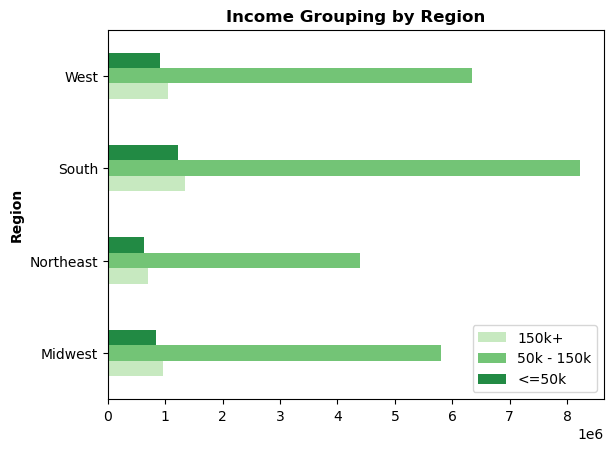

In [24]:
#Creating a bar chart of the regions, divided up by the income groups

region_income = crosstab_region_income.plot(kind = 'barh', color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Region', fontweight = 'bold', fontsize = 10)
plt.title('Income Grouping by Region', fontweight = 'bold', fontsize = 12)
plt.show()

#### Customers with income 50k-150k in southern region is the highest category.

In [25]:
# Exporting income profile region chart

region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income.png'))

### 4.2 Income - Department Grouping

In [26]:
# Creating a crosstab of the department and income groups

crosstab_dept_income = pd.crosstab(df_all['department'], df_all['income_profile'], dropna = False)

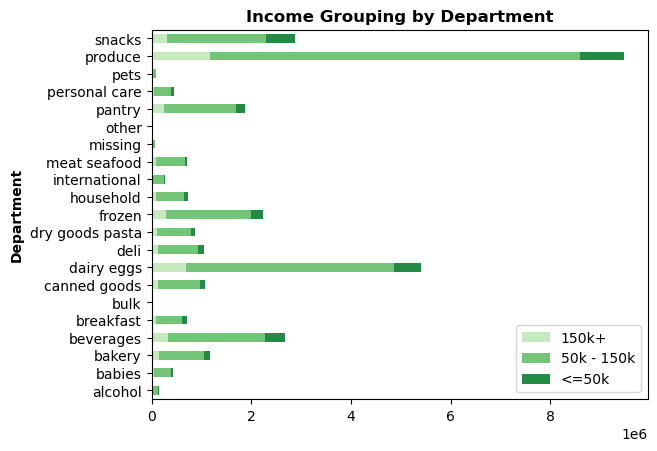

In [27]:
#Creating a stacked bar chart of the departments, divided up by the income groups

dept_income = crosstab_dept_income.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold', fontsize = 10)
plt.title('Income Grouping by Department', fontweight = 'bold', fontsize = 12)
plt.show()

#### Produce is the highest category in department followed by dairy eggs across income groups.

In [28]:
# Exporting income profile dept chart

dept_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_income.png'))

## 5. Family Status Profiling

In [29]:
df_all.loc[(df_all['number_of_dependants'] == 0), 'family_profile'] = 'Single Adult'
df_all.loc[(df_all['number_of_dependants'] != 0), 'family_profile'] = 'Family'
df_all['family_profile'].value_counts(dropna = False)

Family          24306889
Single Adult     8097400
Name: family_profile, dtype: int64

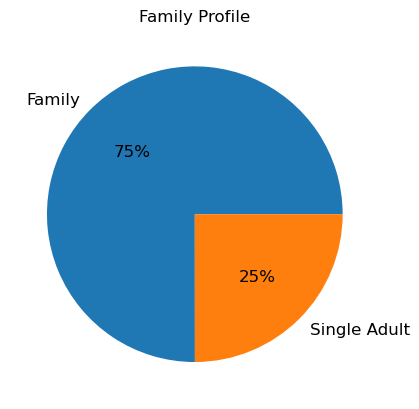

In [30]:
# Categorizing family status visually using pie chart

family_profile_pie = df_all['family_profile'].value_counts().plot.pie(title = 'Family Profile', label = '', fontsize = 12, autopct = ('%1.f%%'))

#### Customers with number of dependants (Family customers) is the highest in proportion compared to single adult customers.

In [31]:
# Exporting family profile distribution chart

family_profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_pie.png'))

In [32]:
# Summary statistics of family status across order frequency and expenditure

family_sums = df_all.groupby(['family_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
family_sums

days_since_prior_order                  prices                  \
                                  min   max       mean    min   max      mean   
family_profile                                                                  
Family                            0.0  30.0  11.111767    1.0  25.0  7.792463   
Single Adult                      0.0  30.0  11.080762    1.0  25.0  7.790995   

                              
                         sum  
family_profile                
Family          1.894105e+08  
Single Adult    6.308680e+07

#### The average number of days between each order is 11 across customers of all family category. Customers with family have contributed the highest revenue to Instacart compared to single adult.

### 5.1 Family Status - Region Grouping

In [33]:
# Creating a crosstab of the regions and family status

crosstab_region_family = pd.crosstab(df_all['region'], df_all['family_profile'], dropna = False)

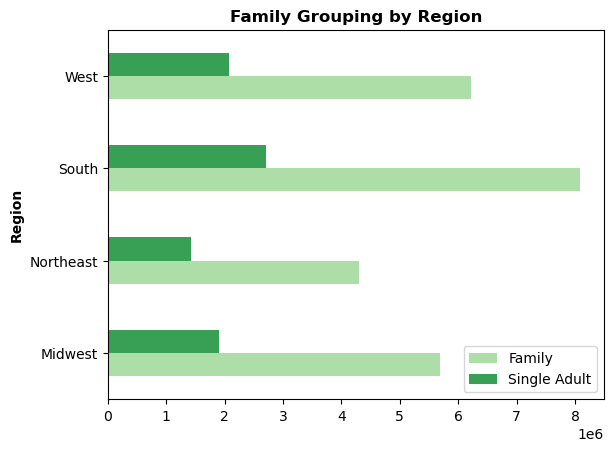

In [34]:
# Creating a stacked bar chart of the regions, divided up by the family groups

region_family = crosstab_region_family.plot(kind = 'barh', color = sns.color_palette('Greens', 2))
plt.legend(loc='lower right')
plt.ylabel('Region', fontweight = 'bold', fontsize = 10)
plt.title('Family Grouping by Region', fontweight = 'bold', fontsize = 12)
plt.show()

#### Customers with family in southern region is the highest category.

In [35]:
# Exporting family profile region chart

region_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_family.png'))

### 5.2 Family Status - Department Grouping

In [36]:
# Creating a crosstab of the department and family groups

crosstab_dept_family = pd.crosstab(df_all['department'], df_all['family_profile'], dropna = False)

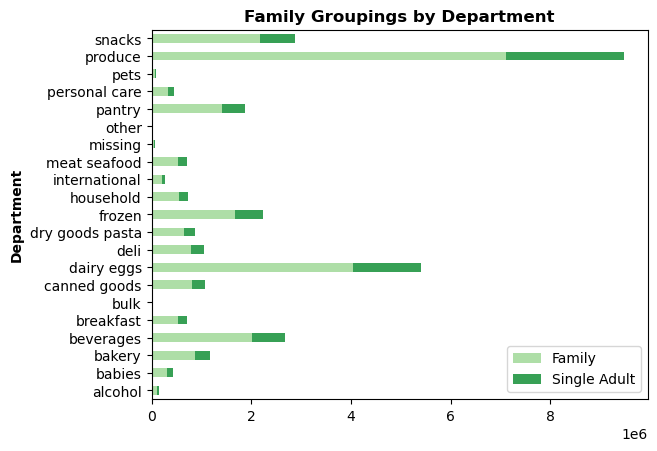

In [37]:
#Creating a stacked bar chart of the departments, divided up by the family groups

dept_family = crosstab_dept_family.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 2))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold', fontsize = 10)
plt.title('Family Groupings by Department', fontweight = 'bold', fontsize = 12)
plt.show()

#### Customers with family purchase the most products in produce department followed by dairy eggs.

In [38]:
# Exporting family profile dept chart

dept_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_family.png'))

## 6. Day of the Week Profiling

In [39]:
df_all['order_day_of_week'].value_counts(dropna = False)

0    6204040
1    5660135
6    4496403
2    4213760
5    4205721
3    3840476
4    3783754
Name: order_day_of_week, dtype: int64

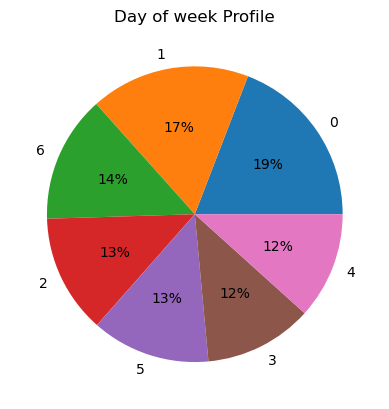

In [40]:
# Categorizing day of week visually using pie chart

day_of_week_pie = df_all['order_day_of_week'].value_counts().plot.pie(title = 'Day of week Profile', label = '', autopct = ('%1.f%%'))

#### Saturday is the day with highest orders.

In [41]:
# Exporting day of week profile distribution chart

day_of_week_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_of_week_pie.png'))

In [42]:
# Summary statistics of day of week across order frequency and expenditure

day_of_week_sums = df_all.groupby(['order_day_of_week']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
day_of_week_sums

days_since_prior_order                  prices        \
                                     min   max       mean    min   max   
order_day_of_week                                                        
0                                    0.0  30.0  11.614778    1.0  25.0   
1                                    0.0  30.0  11.298652    1.0  25.0   
2                                    0.0  30.0  11.282324    1.0  25.0   
3                                    0.0  30.0  10.874866    1.0  25.0   
4                                    0.0  30.0  10.547614    1.0  25.0   
5                                    0.0  30.0  10.452087    1.0  25.0   
6                                    0.0  30.0  11.269054    1.0  25.0   

                                          
                       mean          sum  
order_day_of_week                         
0                  7.858599  48755061.18  
1                  7.760840  43927403.49  
2                  7.755491  32679777.69  
3                  7.758688  29797056.25  
4                  7.757363  29351952.14  
5                  7.763620  32651618.02  
6                  7.858387  35334475.15

#### The average number of days between each order is 10 or 11 across different days of week. Saturday is the highest revenue day across week.

### 6.1 Day of the Week - Region Grouping

In [43]:
# Creating a crosstab of the regions and day of week

crosstab_region_day_of_week = pd.crosstab(df_all['region'], df_all['order_day_of_week'], dropna = False)

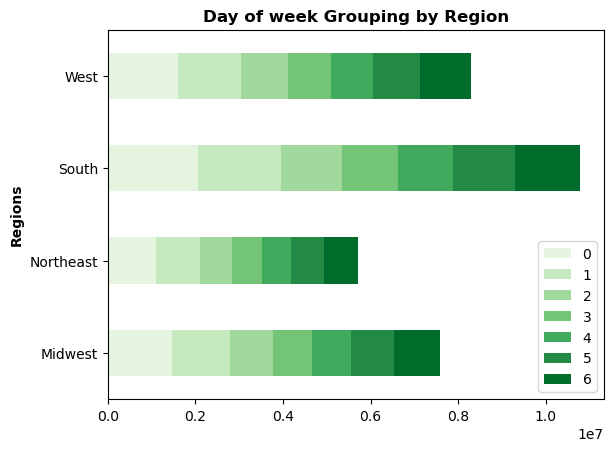

In [44]:
# Creating a stacked bar chart of the regions, divided up by the family groups

region_day_of_week = crosstab_region_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 7))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold', fontsize = 10)
plt.title('Day of week Grouping by Region', fontweight = 'bold', fontsize = 12)
plt.show()

#### Saturday in southern region is the highest category.

In [45]:
# Exporting day of week profile region chart

region_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_day_of_week.png'))

### 6.2 Day of Week - Department Grouping

In [46]:
# Creating a crosstab of the department and day of week

crosstab_dept_day_of_week = pd.crosstab(df_all['department'], df_all['order_day_of_week'], dropna = False)

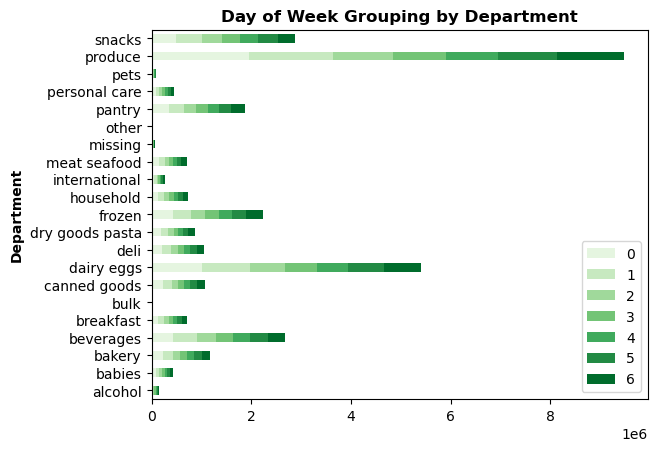

In [47]:
# Creating a stacked bar chart of the departments, divided up by the day of week

dept_day_of_week = crosstab_dept_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Greens', 7))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold', fontsize = 10)
plt.title('Day of Week Grouping by Department', fontweight = 'bold', fontsize = 12)
plt.show()

#### Customers purchase the most products in produce department followed by dairy eggs on Saturday.

In [48]:
# Exporting day of week profile dept chart

dept_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_day_of_week.png'))

In [49]:
# Removing columns that aren't necessary

df_all = df_all.drop(columns = ['add_to_cart_order', 'reordered', 'aisle_id'])

In [50]:
df_all.shape

(32404289, 31)

In [51]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404289 entries, 0 to 32404288
Data columns (total 31 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int32  
 1   user_id                        int32  
 2   order_number                   int8   
 3   order_day_of_week              int8   
 4   order_hour_of_day              int8   
 5   days_since_prior_order         float16
 6   product_id                     int32  
 7   product_name                   object 
 8   department_id                  int8   
 9   prices                         float64
 10  department                     object 
 11  price_range                    object 
 12  day_busyness_level             object 
 13  hour_busyness_level            object 
 14  max_order                      int8   
 15  loyalty_flag                   object 
 16  average_price                  float64
 17  spending_flag                  object 
 18  

In [52]:
# Exporting final df

df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))